# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0381 Короткина Елизавета, Магнитов Сергей и Сарычева Александра. Вариант №6.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Спектр дискретного сигнала вычисляется по формуле:

$$S(\omega)=\displaystyle\sum_{k}x_k e^{-i\omega k}$$

Спектр позволяет рассматривать сигнал в частотной области, что позволяет проанализировать амплитудно-частотную характеристику. Данная формула получается с помощью применения дискретных преобразований Фурье. Данный метод обладает следующими некоторыми свойствами:

1) Линейность

2) Стационарность

3) Симметрия

4) Обратимость

5) Произведение: $z(k)=x(k) \cdot y(k) \implies Z(n)=\frac{1}{N}\displaystyle\sum_{k}^{N-1} X(k)\cdot Y(n-k)$

Дискретный фильтр — это произвольная система обработки дискретного
сигнала, обладающая свойствами линейности и стационарности. Фильтры сглаживания применяются часто для фильтрации сигнала от скачкообразных изменений. Ступенчатый сигнал за счёт множества резких, но небольших по амплитуде, перепадов уровня содержит высокочастотные составляющие, которых нет в сглаженном сигнале.


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

**0. Инициализация данных.**

Загрузка библиотек.

In [373]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings

**1. Формировать дискретного сигнала посредством дискретизации с шагом T=1 непрерывного сигнала, представляющего собой линейную комбинацию косинусоид.**

Для начала необходимо создать аналоговый сигнал, который далее будет дискретизирован. По условию аналоговый сигнал должен иметь следующий вид:

$$s(t) = \displaystyle\sum_{k} A_k \cdot cos(\omega_kt+\varphi_k)$$

Значение $A_k$ определяется случайным образом из диапазона целых чисел от 1 до 11. Параметр $\varphi_k$ является случайной величиной из промежутка от 0 до 0.5. Численное значение $\omega_k$ изменяется в пределах от 0 до $\pi$ с шагом $Δω=0.1\pi$. Чтобы отнормировать аналоговый сигнал, было выполнено деление на сумму коэффициентов $A_k$. Чтобы получить как можно более приближенный сигнал к аналоговому с помощью программных средств в коде были использованы 512 точек.

In [374]:
def Analog_Signal():
  A = []
  phi = []
  w = []
  y = np.linspace(0, 0, 512)
  x = np.linspace(0, 32, 512)
  for i in range(11):
    A.append(random.randint(1, 11))
    phi.append(random.uniform(0, 0.5))
    w.append(0.1*i*np.pi)

  for A_i, phi_i, w_i in zip(A, phi, w):
    y += A_i*np.cos(np.array(w_i*x) + phi_i)

  y = y/sum(A)
  return x, y

Далее была проведена дискретизация этого сигнала. Полученная последовательность включает в себя 32 отсчёта. Для этого была выбрана каждая шестнадцатая точка аналогового сигнала, полученного программным способом.

In [375]:
def Discrete_Signal(y):
  discrete_y = np.linspace(0, 0, 32)
  for i in range(32):
    discrete_y[i] = y[i*16]
  return discrete_y

**2. Визуализация аналогового и дискретного сигналов.**

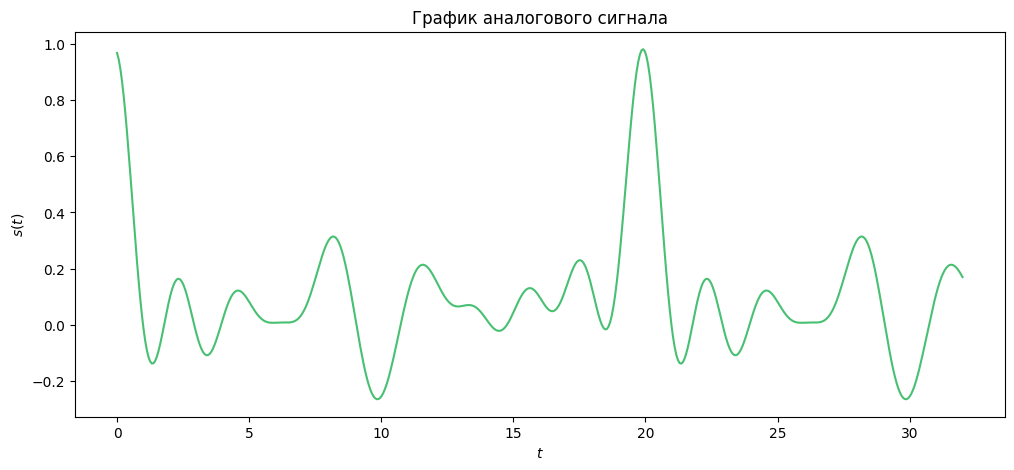

In [376]:
analog_x, analog_y = Analog_Signal()
plt.figure(figsize=(12, 5))
plt.title("График аналогового сигнала")
plt.ylabel('$s(t)$')
plt.xlabel(r'$t$')
plt.plot(analog_x, analog_y, color="#48c072")

<StemContainer object of 3 artists>

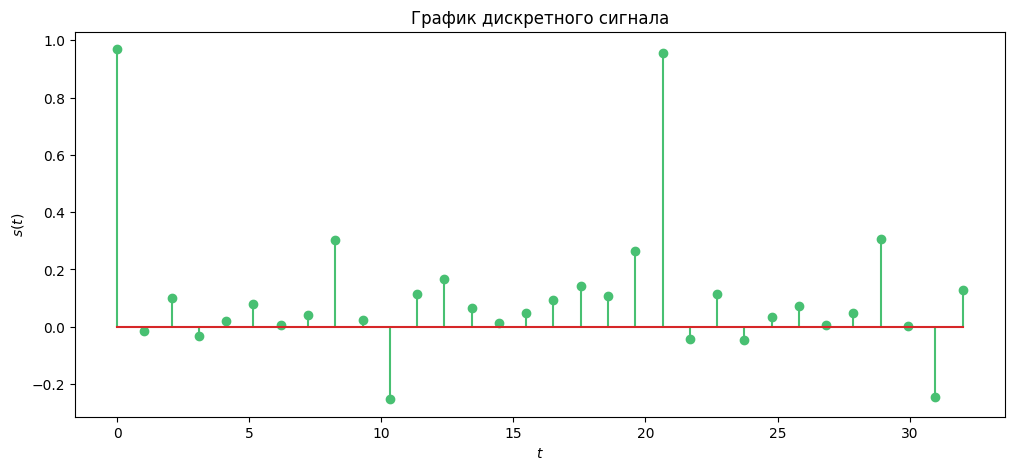

In [377]:
discrete_x = np.linspace(0, 32, 32)
discrete_y = Discrete_Signal(analog_y)
plt.figure(figsize=(12, 5))
plt.title("График дискретного сигнала")
plt.ylabel('$s(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, discrete_y, linefmt="#48c072")

**3. Нахождение спектра дискретного сигнала с помощью дискретного преобразования Фурье. Визуализация спектра.**

Дискретный сигнал может быть представлен в следующем виде:

$$s(t)=\displaystyle\sum_{k} x_k \delta(t-k)$$

Тогда, пользуясь свойствами преобразования Фурье, спектр дискретного сигнала можно представить в виде следующей функции:

$$S(\omega)=\displaystyle\sum_{k}x_k e^{-i\omega k}$$

Получение спектра позволяет изучить амплитудную частотную характеристику: косинусоиды с какими амплитудами использовались при формировании сигнала.

Спектр является переодической функцией, а также симметричен относительно нулевой частоты, что подтверждается на графике.

In [378]:
def Signal_spectrum(set_w, set_y):
  S = 0
  for i in range(len(set_y)):
    S += set_y[i]*np.exp(-1j*set_w*i)
  return S

<StemContainer object of 3 artists>

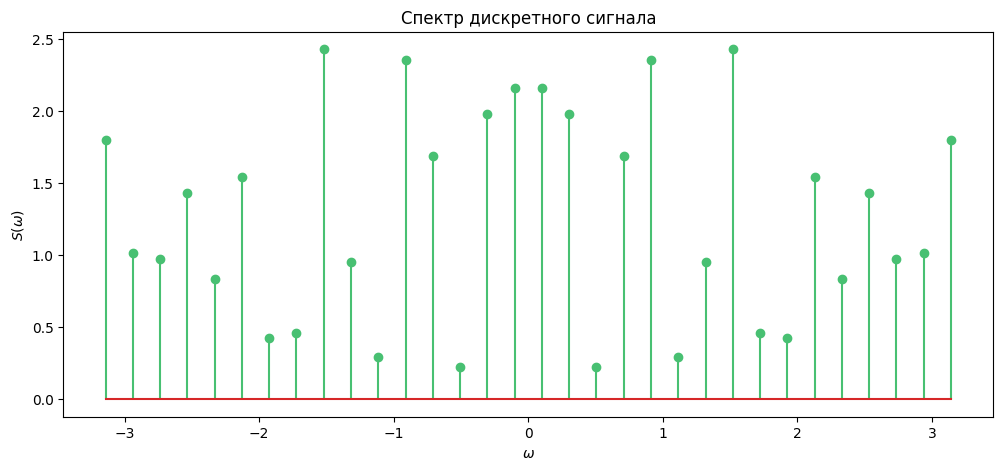

In [379]:
current_w = np.linspace(-np.pi, np.pi, 32)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, discrete_y)), linefmt="#48c072")

**4. Приминение линейного сглаживания по 5-ти и 9-ти точкам для дискретного сигнала.**

Сглаживание по 5-ти точкам осуществляется по следующей формулы:

$$y_n = \frac{s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}}{5}$$

Передаточная функция для данного метода выглядит следующим образом:

$$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)}{5}$$

Сглаживание по 9-ти точкам осуществляется по следующей формулы:

$$y_n = \frac{s_{n-4}+s_{n-3}+s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}+s_{n+3}+s_{n+4}}{9}$$

Передаточная функция для данного метода выглядит следующим образом:

$$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega)}{9}$$

К дискретному сигналу были применены рассмотренные формулы линейного сглаживания для той области, в которой это было возможно, а для крайних участков была произведена аппроксимация.

In [380]:
def linear_smoothing_5(set_y):
  new_y = np.zeros(len(set_y))
  for i in range(2, len(set_y)-2):
    new_y[i] = (set_y[i-2] + set_y[i-1] + set_y[i] + set_y[i+1] + set_y[i+2])/5
  return new_y

In [381]:
def linear_smoothing_9(set_y):
  new_y = np.zeros(len(set_y))
  for i in range(4, len(set_y)-4):
    new_y[i] = (set_y[i-4] + set_y[i-3] + set_y[i-2] + set_y[i-1] + set_y[i] + set_y[i+4] + set_y[i+3] + set_y[i+2] + set_y[i+1])/9
  return new_y

In [382]:
sm_discrete_y5 = np.convolve(discrete_y, np.ones(5), 'same') / 5
sm_discrete_y9 = np.convolve(discrete_y, np.ones(9), 'same') / 9

**5. Визуализация дискретного сигнала после фильтрации с помощью линейного сглаживания.**

<StemContainer object of 3 artists>

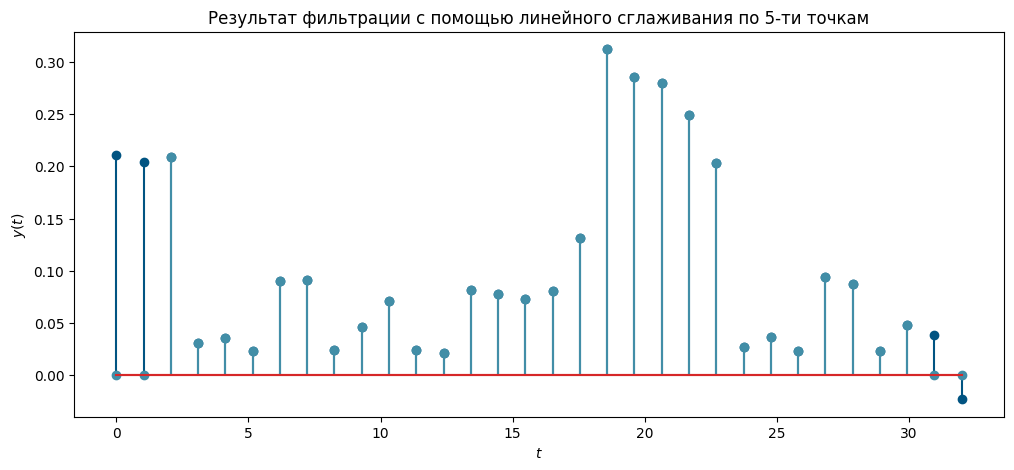

In [383]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью линейного сглаживания по 5-ти точкам")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, sm_discrete_y5, linefmt="#015482")
plt.stem(discrete_x, linear_smoothing_5(discrete_y), linefmt="#428EA7")

<StemContainer object of 3 artists>

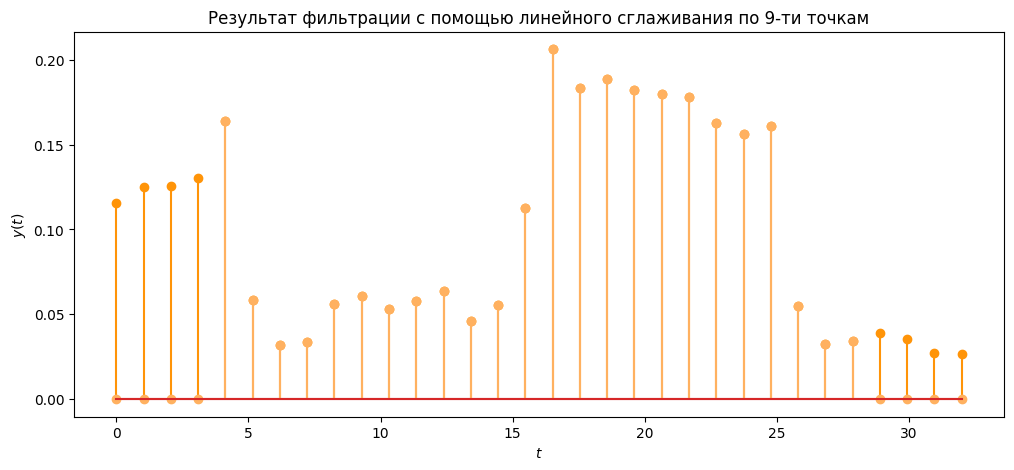

In [384]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью линейного сглаживания по 9-ти точкам")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, sm_discrete_y9, linefmt="#ff9408")
plt.stem(discrete_x, linear_smoothing_9(discrete_y), linefmt="#FFB160")

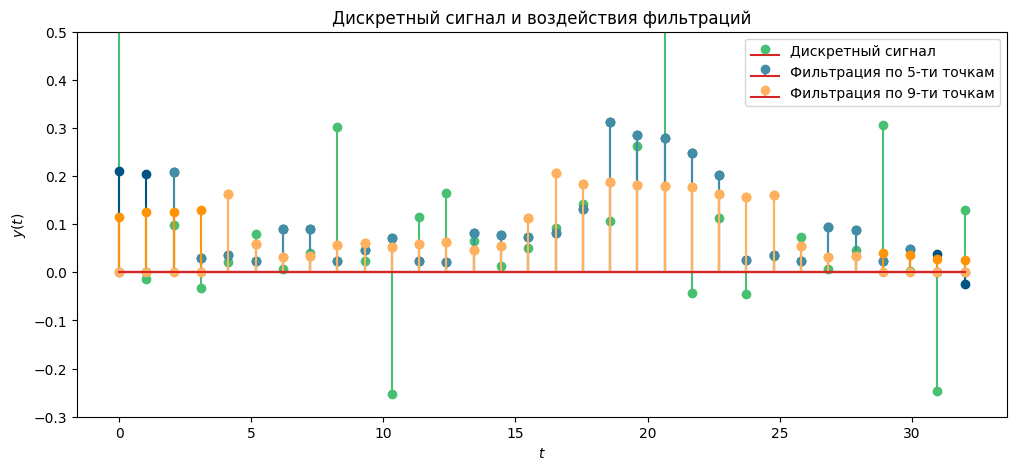

In [385]:
plt.figure(figsize=(12, 5))
plt.title("Дискретный сигнал и воздействия фильтраций")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.ylim(-0.3, 0.5)
plt.stem(discrete_x, discrete_y, linefmt="#48c072", label="Дискретный сигнал")
plt.stem(discrete_x, sm_discrete_y5, linefmt="#015482")
plt.stem(discrete_x, linear_smoothing_5(discrete_y), linefmt="#428EA7", label="Фильтрация по 5-ти точкам")
plt.stem(discrete_x, sm_discrete_y9, linefmt="#ff9408")
plt.stem(discrete_x, linear_smoothing_9(discrete_y), linefmt="#FFB160", label="Фильтрация по 9-ти точкам")
plt.legend()

**6. Нахождение спектра сигнала с помощью дискретного преобразования Фурье после фильтрации. Визуализация спектра.**

Было использовано то же самое преобразование, которое задавалось в пункте 3.

<StemContainer object of 3 artists>

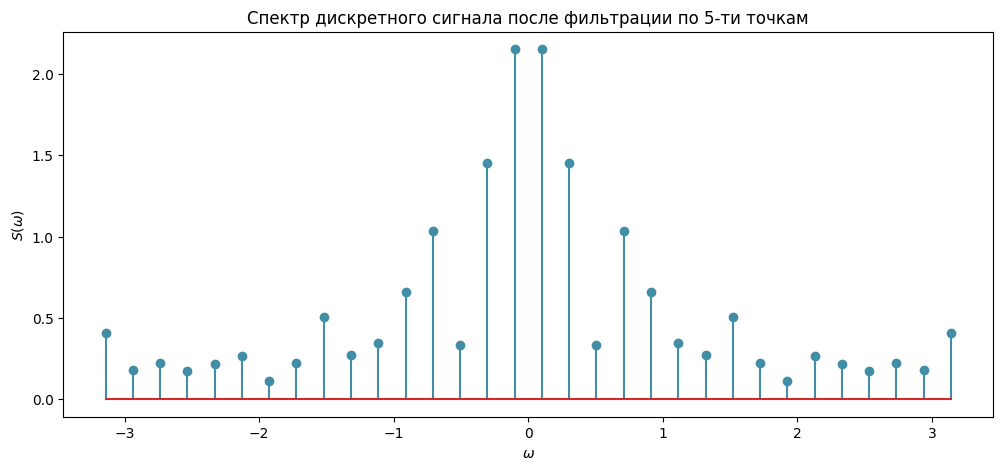

In [386]:
current_w = np.linspace(-np.pi, np.pi, 32)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала после фильтрации по 5-ти точкам")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y5)), linefmt="#428EA7")

<StemContainer object of 3 artists>

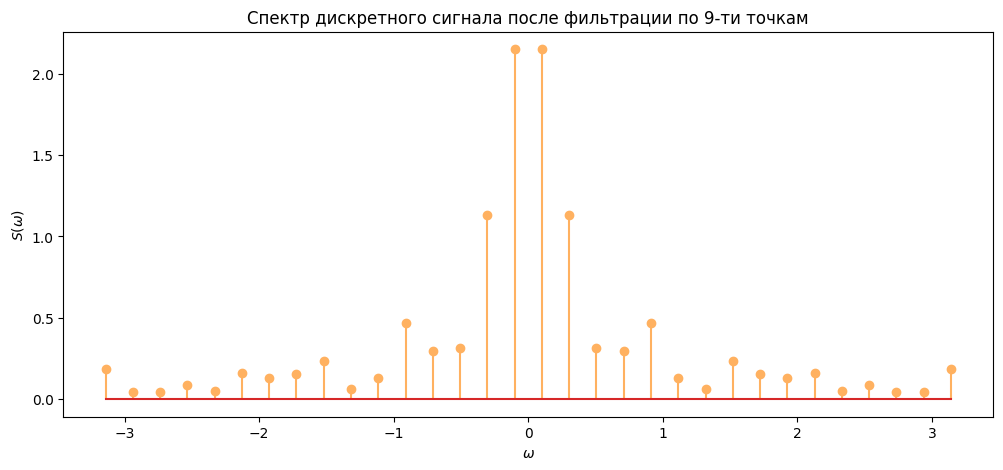

In [387]:
current_w = np.linspace(-np.pi, np.pi, 32)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала после фильтрации по 9-ти точкам")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y9)), linefmt="#FFB160")

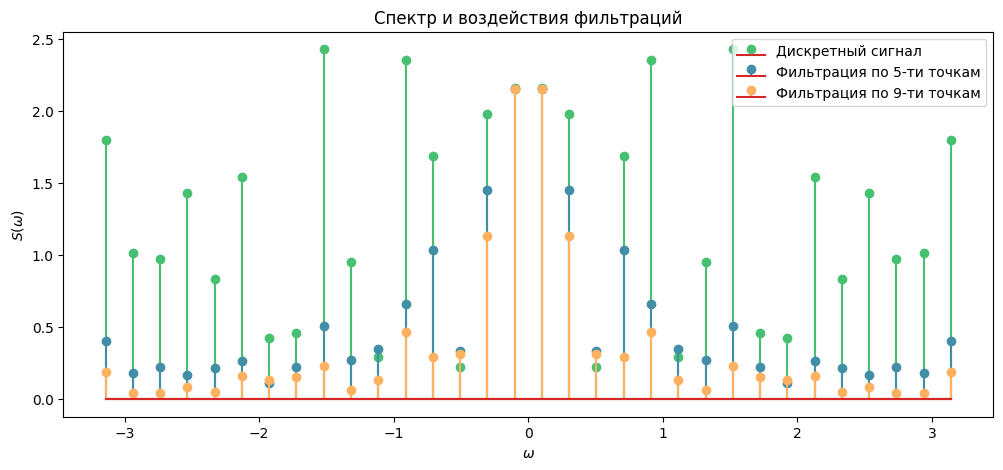

In [388]:
plt.figure(figsize=(12, 5))
plt.title("Спектр и воздействия фильтраций")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, discrete_y)), linefmt="#48c072", label="Дискретный сигнал")
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y5)), linefmt="#428EA7", label="Фильтрация по 5-ти точкам")
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y9)), linefmt="#FFB160", label="Фильтрация по 9-ти точкам")
plt.legend()

**7. Анализ результатов.**

По графикам видно, что фильтрации уменьшили амплитуды сигналов в частотной области, достаточной далекой от 0. В районе нулевого значения частоты сигнал подавлялся не так сильно. Полученные выводы и полоса пропускания сигнала согласуются с выводами, сделанными относительно $H(\omega)$ в предыдущем исследовании.

**8.a. Исследование сглаживания полиномом 2-ой степени по 5 и 9 узлам.**

*8.a.4. Применение линейного сглаживания полиномом 2-ой степени по 5 и 9 узлам для дискретного сигнала.*

Сглаживание по 5-ти точкам осуществляется по следующей формулы:

$$y_n = \frac{-3s_{n-2} + 12s_{n-1} + 17s_{n} +12s_{n+1} - 3s_{n+2}}{35}$$

Передаточная функция для данного метода выглядит следующим образом:

$$H(\omega) = \frac{17 + 24\cos\omega - 6\cos{2\omega}}{35}$$

Сглаживание по 9-ти точкам осуществляется по следующей формулы:

$$y_n = \frac{-21s_{n-4} + 14s_{n-3} + 39s_{n-2} + 54s_{n-1} + 59s_n + 54s_{n+1} + 39s_{n+2} + 14s_{n+3} - 21s_{n+4}}{231}$$

Передаточная функция для данного метода выглядит следующим образом:

$$H(\omega)=\frac{59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)}{231}$$

К дискретному сигналу были применены рассмотренные формулы линейного сглаживания для той области, в которой это было возможно, а для крайних участков была произведена аппроксимация.

In [389]:
def quadratic_smoothing_5(set_y):
  new_y = np.zeros(len(set_y))
  for i in range(2, len(set_y)-2):
    new_y[i] = (-3*set_y[i-2] + 12*set_y[i-1] + 17*set_y[i] + 12*set_y[i+1] + -3*set_y[i+2])/35
  return new_y

In [390]:
def quadratic_smoothing_9(set_y):
  new_y = np.zeros(len(set_y))
  for i in range(4, len(set_y)-4):
    new_y[i] = (-21*set_y[i-4] + 14*set_y[i-3] + 39*set_y[i-2] + 54*set_y[i-1] + 59*set_y[i] + 54*set_y[i+1] + 39*set_y[i+2] + 14*set_y[i+3] + -21*set_y[i+4])/231
  return new_y

In [391]:
sm_discrete_y5 = np.convolve(discrete_y, np.array([-3, 12, 17, 12, -3]), 'same') / 35
sm_discrete_y9 = np.convolve(discrete_y, np.array([-21, 14, 39, 54, 59, 54, 39, 14,-21]), 'same') / 231

*8.a.5. Визуализация дискретного сигнала после фильтрации с помощью квадратичного сглаживания.*

<StemContainer object of 3 artists>

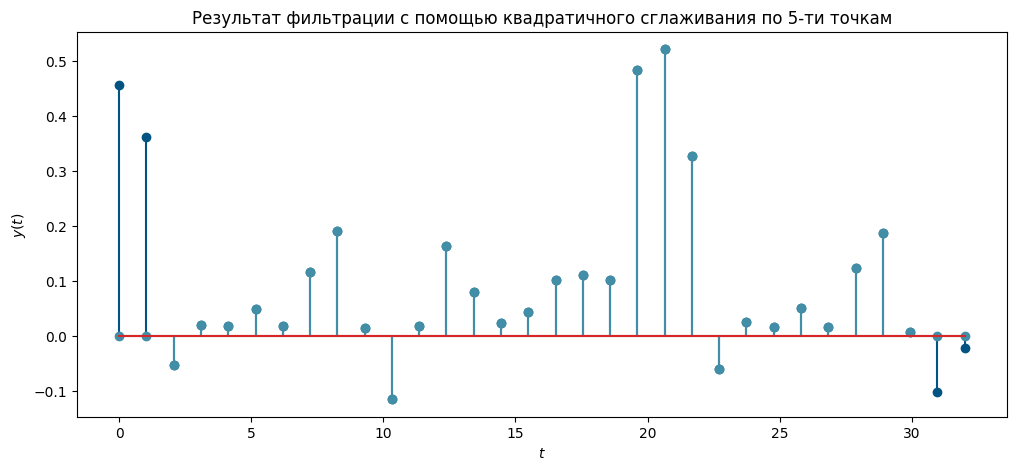

In [392]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью квадратичного сглаживания по 5-ти точкам")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, sm_discrete_y5, linefmt="#015482")
plt.stem(discrete_x, quadratic_smoothing_5(discrete_y), linefmt="#428EA7")

<StemContainer object of 3 artists>

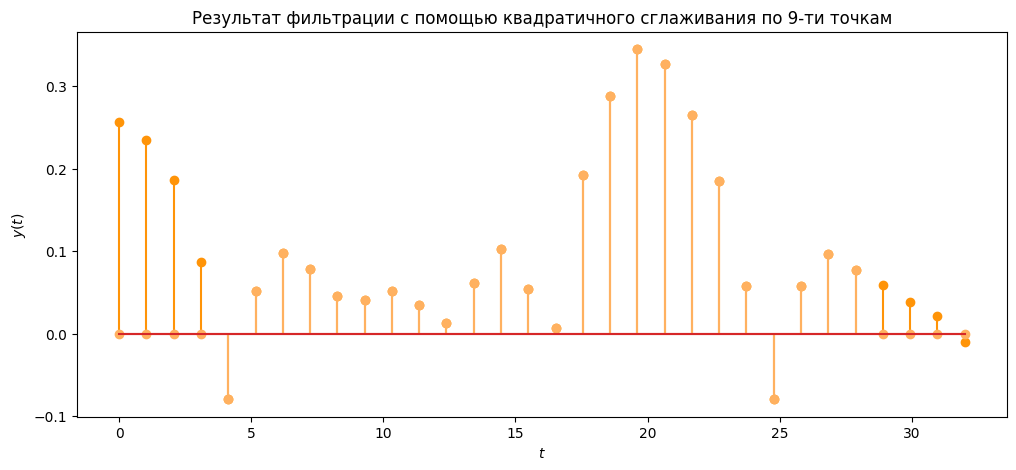

In [393]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью квадратичного сглаживания по 9-ти точкам")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, sm_discrete_y9, linefmt="#ff9408")
plt.stem(discrete_x, quadratic_smoothing_9(discrete_y), linefmt="#FFB160")

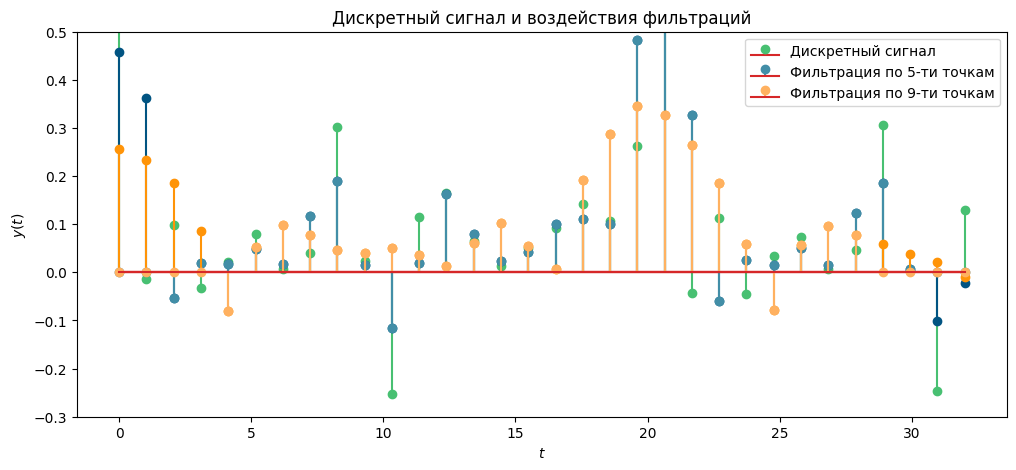

In [394]:
plt.figure(figsize=(12, 5))
plt.title("Дискретный сигнал и воздействия фильтраций")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.ylim(-0.3, 0.5)
plt.stem(discrete_x, discrete_y, linefmt="#48c072", label="Дискретный сигнал")
plt.stem(discrete_x, sm_discrete_y5, linefmt="#015482")
plt.stem(discrete_x, quadratic_smoothing_5(discrete_y), linefmt="#428EA7", label="Фильтрация по 5-ти точкам")
plt.stem(discrete_x, sm_discrete_y9, linefmt="#ff9408")
plt.stem(discrete_x, quadratic_smoothing_9(discrete_y), linefmt="#FFB160", label="Фильтрация по 9-ти точкам")
plt.legend()

*8.a.6. Нахождение спектра сигнала с помощью дискретного преобразования Фурье после фильтрации. Визуализация спектра.*

Было использовано то же самое преобразование, которое задавалось в пункте 3.

<StemContainer object of 3 artists>

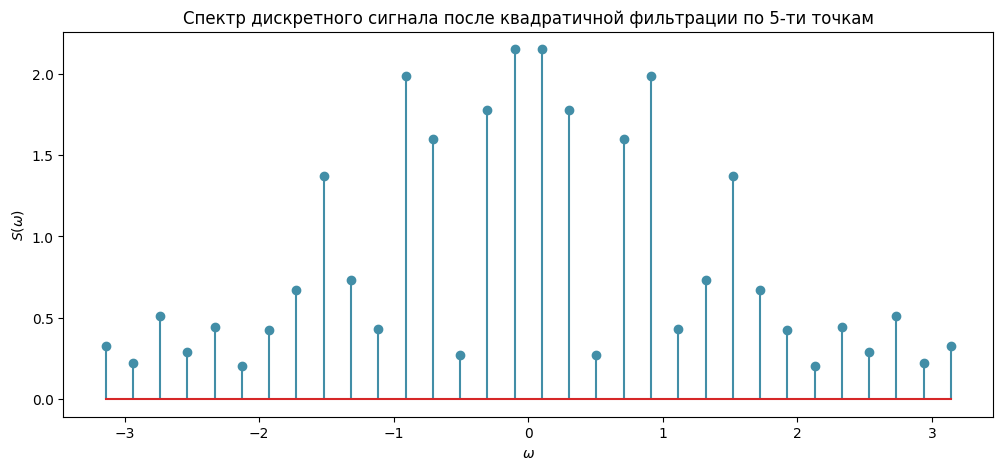

In [395]:
current_w = np.linspace(-np.pi, np.pi, 32)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала после квадратичной фильтрации по 5-ти точкам")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y5)), linefmt="#428EA7")

<StemContainer object of 3 artists>

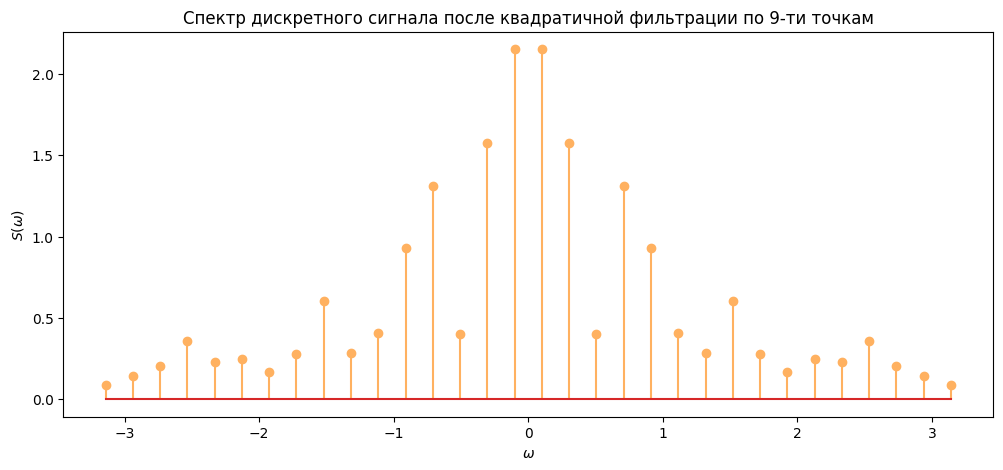

In [396]:
current_w = np.linspace(-np.pi, np.pi, 32)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала после квадратичной фильтрации по 9-ти точкам")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y9)), linefmt="#FFB160")

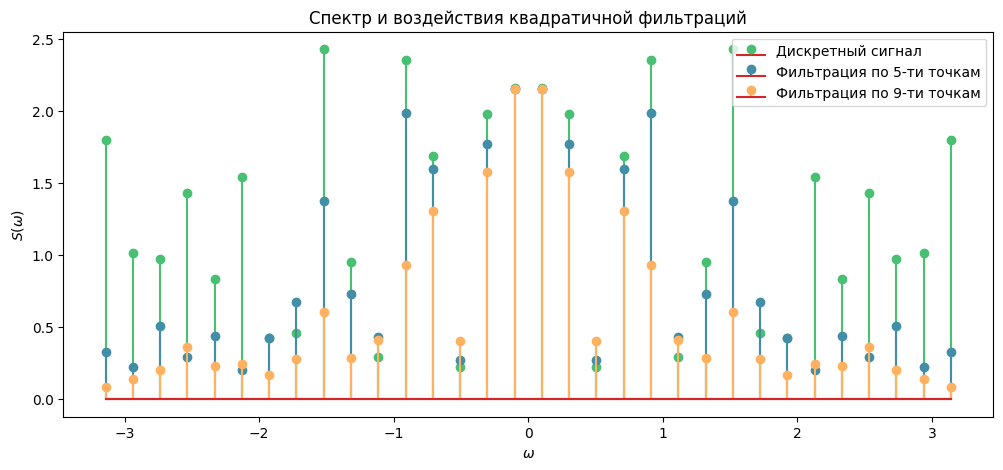

In [397]:
plt.figure(figsize=(12, 5))
plt.title("Спектр и воздействия квадратичной фильтраций")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, discrete_y)), linefmt="#48c072", label="Дискретный сигнал")
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y5)), linefmt="#428EA7", label="Фильтрация по 5-ти точкам")
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y9)), linefmt="#FFB160", label="Фильтрация по 9-ти точкам")
plt.legend()

*8.a.7. Анализ результатов.*

В данном случае видно, что полоса пропускания сигнала становится шире относительно предыдущего пункта, а остальный амплитуды сигнала заметно подавляются. Полученные результаты также согласуются с выводами, сделанными о $H(\omega)$ ранее.

**8.b. Исследование сглаживания полиномом 4-ой степени по 7 и 11 узлам.**

*8.b.4. Применение линейного сглаживания полиномом 4-ой степени по 7 и 11 узлам для дискретного сигнала.*

Сглаживание по 7-ти точкам осуществляется по следующей формулы:

$$y_n = \frac{5s_{n-3} - 30s_{n-2} + 75s_{n-1} + 131s_n + 75s_{n+1} - 30s_{n+2} + 5s_{n+3}}{231}$$

Передаточная функция для данного метода выглядит следующим образом:

$$H(\omega) = \frac{131 + 150cos(\omega) - 60cos(2\omega) + 10cos(3\omega)}{231}$$

Сглаживание по 11-ти точкам осуществляется по следующей формулы:

$$y_n = \frac{18s_{n-5} - 45s_{n-4} - 10s_{n-3} + 60s_{n-2} + 120s_{n-1} + 143s_n + 120s_{n+1} + 60s_{n+2} - 10s_{n+3} - 45s_{n+4} + 18s_{n+5}}{429}$$

Передаточная функция для данного метода выглядит следующим образом:

$$H(\omega) = \frac{143 + 240 cos(\omega) + 120 cos(2\omega) − 20 cos(3\omega) - 90 cos(4\omega) + 36 cos(5\omega)}{429}$$

К дискретному сигналу были применены рассмотренные формулы линейного сглаживания для той области, в которой это было возможно, а для крайних участков была произведена аппроксимация.

In [398]:
def four_smoothing_7(set_y):
  new_y = np.zeros(len(set_y))
  for i in range(3, len(set_y)-3):
    new_y[i] = (5*set_y[i-3] + -30*set_y[i-2] + 75*set_y[i-1] + 131*set_y[i] + 75*set_y[i+1] + -30*set_y[i+2] + 5*set_y[i+3])/231
  return new_y

In [399]:
def four_smoothing_11(set_y):
  new_y = np.zeros(len(set_y))
  for i in range(5, len(set_y)-5):
    new_y[i] = (18*set_y[i-5] + -45*set_y[i-4] + -10*set_y[i-3] + 60*set_y[i-2] + 120*set_y[i-1] + 143*set_y[i] + 120*set_y[i+1] + 60*set_y[i+2] + -10*set_y[i+3] + -45*set_y[i+4] + 18*set_y[i+5])/429
  return new_y

In [400]:
sm_discrete_y7 = np.convolve(discrete_y, np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
sm_discrete_y11 = np.convolve(discrete_y, np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]), 'same') / 429

*8.b.5. Визуализация дискретного сигнала после фильтрации с помощью сглаживания полиномом 4-ой степени.*

<StemContainer object of 3 artists>

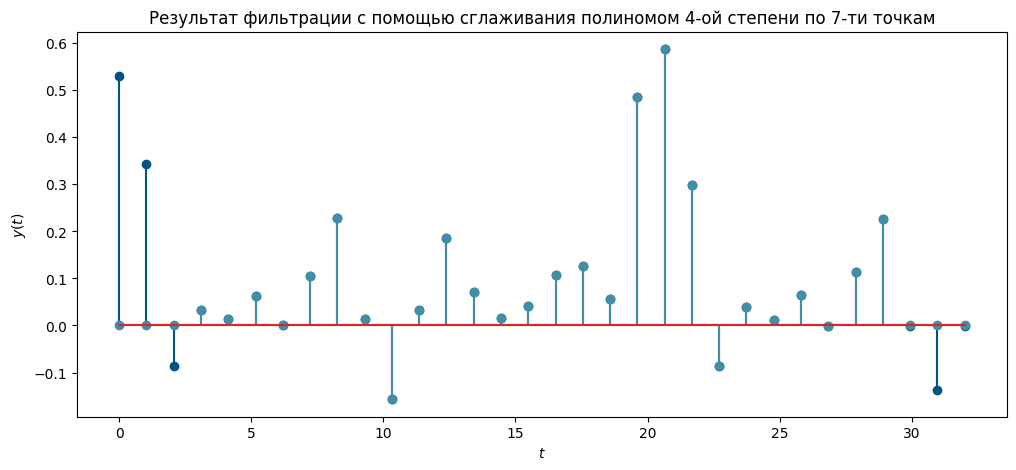

In [401]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью сглаживания полиномом 4-ой степени по 7-ти точкам")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, sm_discrete_y7, linefmt="#015482")
plt.stem(discrete_x, four_smoothing_7(discrete_y), linefmt="#428EA7")

<StemContainer object of 3 artists>

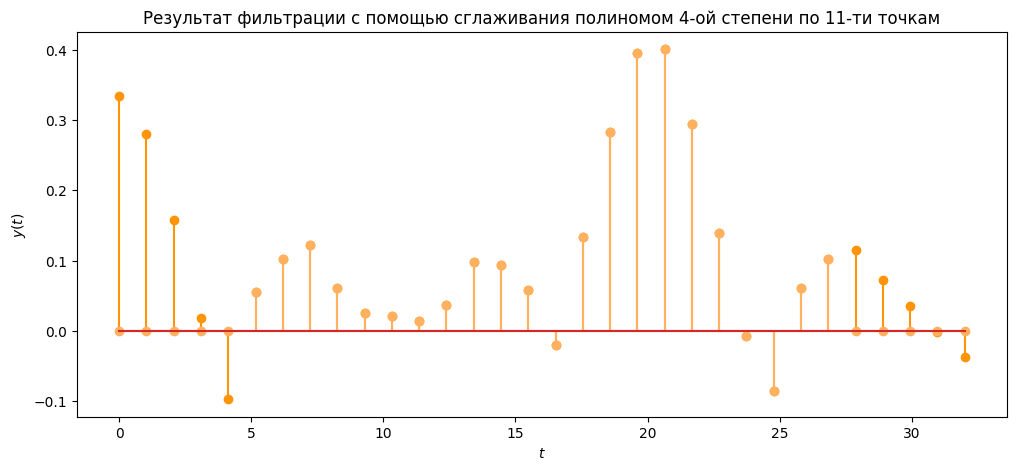

In [402]:
plt.figure(figsize=(12, 5))
plt.title("Результат фильтрации с помощью сглаживания полиномом 4-ой степени по 11-ти точкам")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.stem(discrete_x, sm_discrete_y11, linefmt="#ff9408")
plt.stem(discrete_x, four_smoothing_11(discrete_y), linefmt="#FFB160")

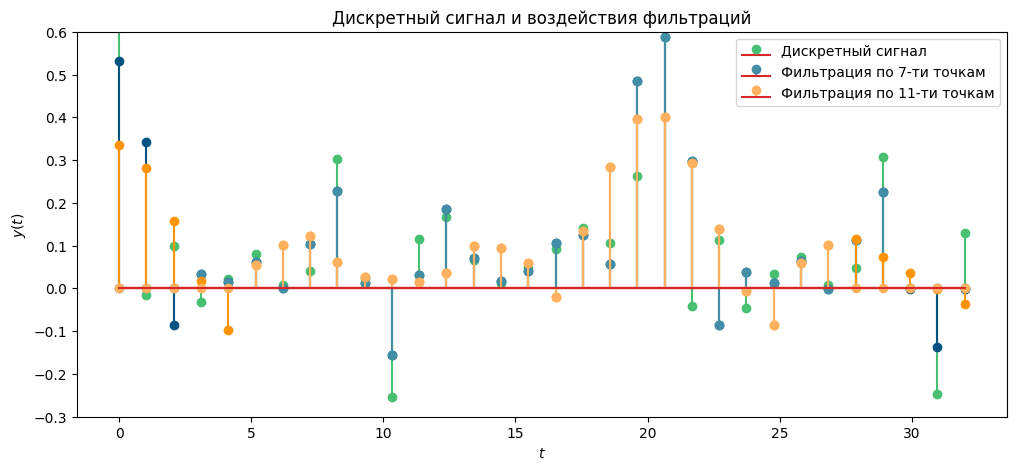

In [403]:
plt.figure(figsize=(12, 5))
plt.title("Дискретный сигнал и воздействия фильтраций")
plt.ylabel('$y(t)$')
plt.xlabel(r'$t$')
plt.ylim(-0.3, 0.6)
plt.stem(discrete_x, discrete_y, linefmt="#48c072", label="Дискретный сигнал")
plt.stem(discrete_x, sm_discrete_y7, linefmt="#015482")
plt.stem(discrete_x, four_smoothing_7(discrete_y), linefmt="#428EA7", label="Фильтрация по 7-ти точкам")
plt.stem(discrete_x, sm_discrete_y11, linefmt="#ff9408")
plt.stem(discrete_x, four_smoothing_11(discrete_y), linefmt="#FFB160", label="Фильтрация по 11-ти точкам")
plt.legend()

*8.b.6. Нахождение спектра сигнала с помощью дискретного преобразования Фурье после фильтрации. Визуализация спектра.*

Было использовано то же самое преобразование, которое задавалось в пункте 3.

<StemContainer object of 3 artists>

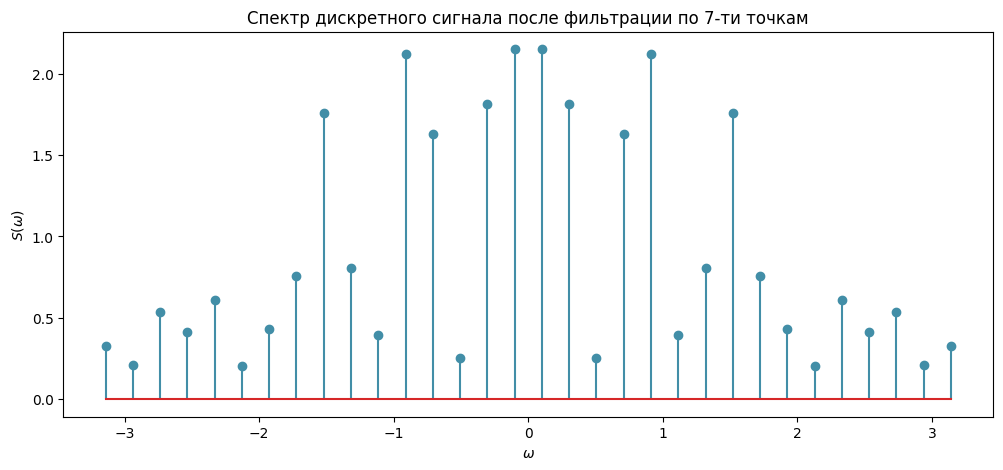

In [404]:
current_w = np.linspace(-np.pi, np.pi, 32)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала после фильтрации по 7-ти точкам")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y7)), linefmt="#428EA7")

<StemContainer object of 3 artists>

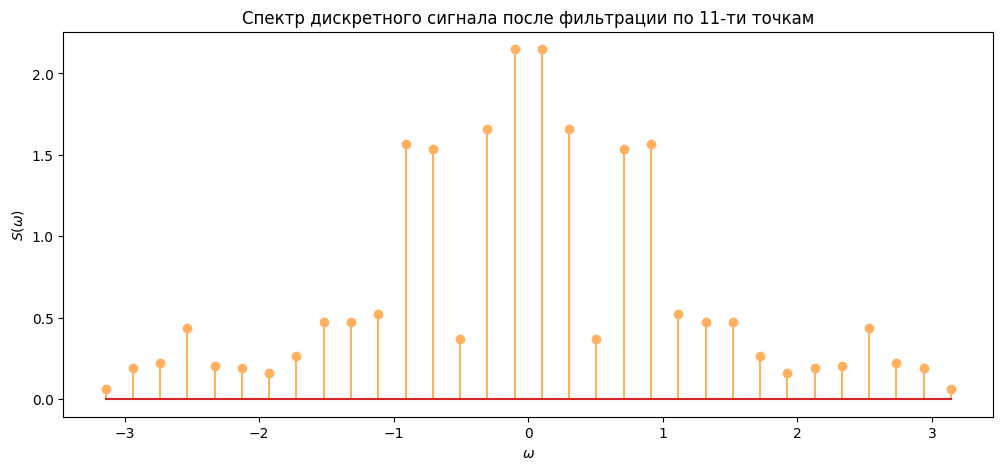

In [405]:
current_w = np.linspace(-np.pi, np.pi, 32)
plt.figure(figsize=(12, 5))
plt.title("Спектр дискретного сигнала после фильтрации по 11-ти точкам")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y11)), linefmt="#FFB160")

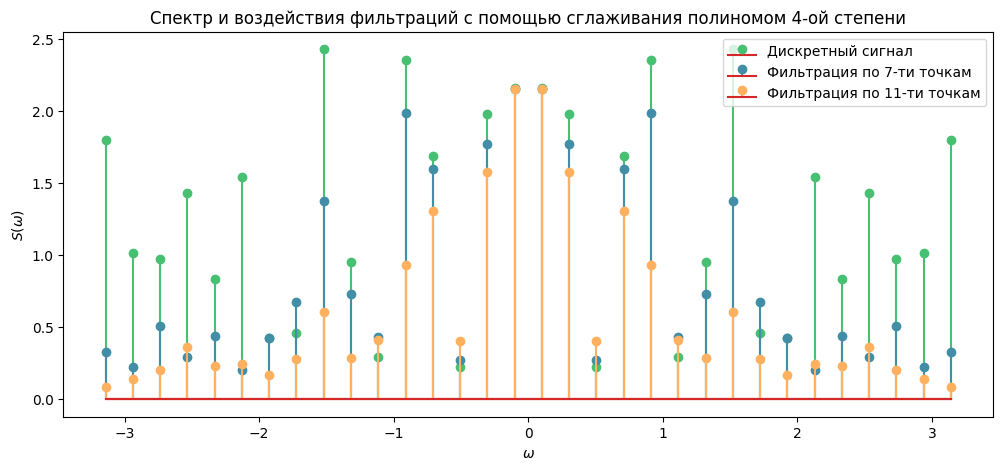

In [406]:
plt.figure(figsize=(12, 5))
plt.title("Спектр и воздействия фильтраций с помощью сглаживания полиномом 4-ой степени")
plt.ylabel('$S(\omega)$')
plt.xlabel(r'$\omega$')
plt.stem(current_w, np.abs(Signal_spectrum(current_w, discrete_y)), linefmt="#48c072", label="Дискретный сигнал")
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y5)), linefmt="#428EA7", label="Фильтрация по 7-ти точкам")
plt.stem(current_w, np.abs(Signal_spectrum(current_w, sm_discrete_y9)), linefmt="#FFB160", label="Фильтрация по 11-ти точкам")
plt.legend()

*8.b.7. Анализ результатов.*

После применения данных фильтраций также можно наблюдать достаточно широкую полосу пропускания сигнала в области нуля. А далее амплитуды начинают подавляться все сильнее и сильнее. Данные показания согласуются с выводами, полученными при соответствующем анализе $H(\omega)$.

**9. Анализ результатов по всем пунктам.**

После исследования дискретных фильтров и наглядной визуализации можно провести анализ их действия. Благодаря сглаживанию сам сигнал становится более плавным. Фильтры помогают убрать резкие перепады амплитуд, что делает анализ сигнала более эффективным. Чем выше степень сглаживания, тем шире становится полоса пропускания сигнала на низких частотах, а сам сигнал избавляется от резких скачков амплитуд. На данные свойства также влияет количество точек, используемых при фильтрации: чем их больше, тем корректнее получаются результаты. Сделанные выводы согласуются с результатами анализа передаточных функций.

## Выводы

В ходе выполнения практической работы был смоделирован аналоговый сигнал, который является линейной комбинацией косинусоид. Данный сигнал был дискретизирован, а затем изучен его спектр, полученный с помощью дискретных преобразований Фурье. К дискретизированному сигналу были применены разные фильтры. Первым рассматривался фильтр, который являлся линейным сглаживанием по 5-ти и 9-ти точкам. После применения фильтрации также был получен спектр. После этого был применён фильтр, являющийся квадратичным сглаживанием по 5-ти и 9-ти точкам, а зачем фильтр сглаживания с помощью полинома 4-ой степени по 7-ми и 11-ти точкам. Во всех случаях были рассмотрены и проанализированы полученные спектры. Все полученные сигналы и спектры были визуализированы для наглядной демонстрации результатов.